In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from random import randint

In [77]:
df = pd.read_csv("dataset/gdp per capita.csv")

df = df.loc[df['Variable'] == 'GDP per capita in USA 2005 PPPs']
exclude = ['OECD - Total', 'Non-OECD Economies', 'World', 'Euro area (15 countries)']
df = df[~df['Country'].isin(exclude)]

df = df[['Country', 'Time', 'Value']]

traducoes_paises = {
    'Luxembourg': 'Luxemburgo',
    'Norway': 'Noruega',
    'United States': 'Estados Unidos',
    'Switzerland': 'Suíça',
    'Netherlands': 'Países Baixos',
    'Canada': 'Canadá',
    'Ireland': 'Irlanda',
    'Australia': 'Austrália',
    'Austria': 'Áustria',
    'Sweden': 'Suécia',
    'Denmark': 'Dinamarca',
    'Iceland': 'Islândia',
    'Belgium': 'Bélgica',
    'Germany': 'Alemanha',
    'France': 'França',
    'United Kingdom': 'Reino Unido',
    'Italy': 'Itália',
    'Japan': 'Japão',
    'South Korea': 'Coreia do Sul',
    'Spain': 'Espanha',
    'Brazil': 'Brasil',
    'Mexico': 'México',
    'China': 'China',
    'India': 'Índia'
}
df['Country'] = df['Country'].replace(traducoes_paises)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [78]:
df = df.pivot(index='Country', columns='Time', values='Value')
df.columns = df.columns.astype(int)
df = df.reindex(columns=np.arange(df.columns.min(), df.columns.max() + 1))
df = df.interpolate(axis=1)
df = df.reset_index()
df = pd.melt(df, id_vars='Country', var_name='Time', value_name='value')

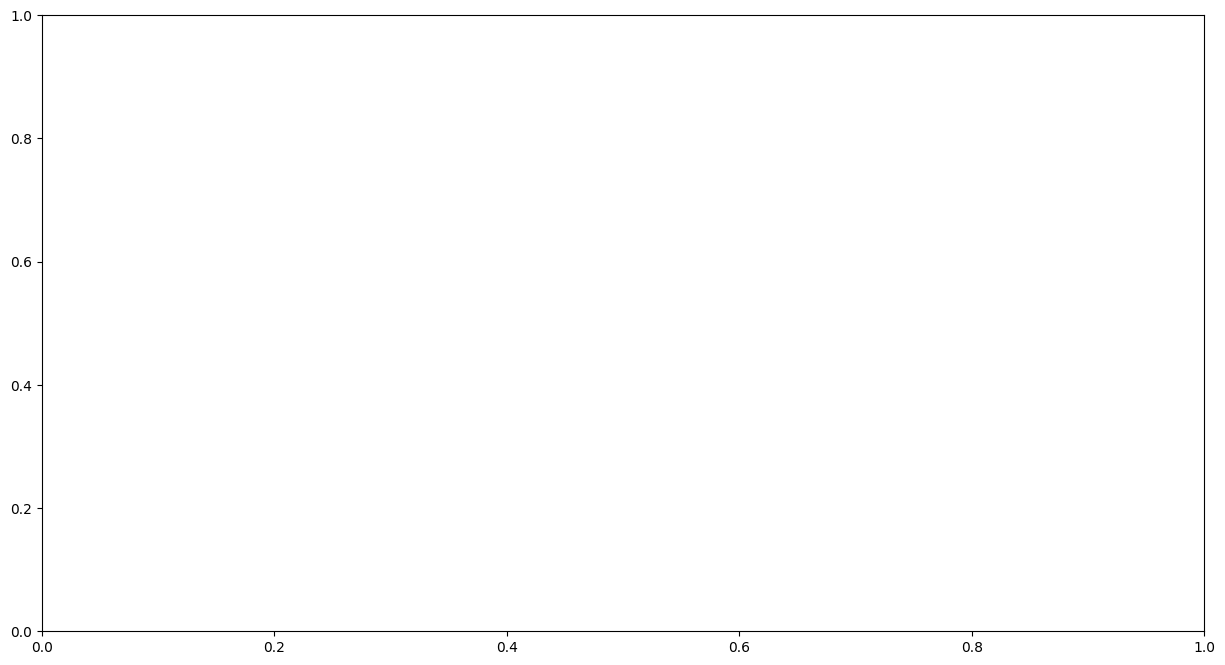

In [79]:
all_names = df['Country'].unique()
colors = {name: f'#{randint(0, 0xFFFFFF):06X}' for name in all_names}

fig, ax = plt.subplots(figsize=(15, 8))
num_of_elements = 10 

max_val = df['value'].max()

def draw_barchart(current_time):
    df_frame = df[df['Time'] == current_time].sort_values(by='value', ascending=True).tail(num_of_elements)
    
    if df_frame.empty:
        return

    ax.clear()
    
    bar_colors = [colors[x] for x in df_frame['Country']]
    ax.barh(df_frame['Country'], df_frame['value'], color=bar_colors, edgecolor='black', linewidth=1)

    dx = max_val / 100

    for i, (value, name) in enumerate(zip(df_frame['value'], df_frame['Country'])):
        ax.text(value + dx, i, f'  {name}', size=12, weight='bold', va='center')
        ax.text(value + dx, i - 0.25, f'  {value:,.0f}', size=10, va='center')

    ax.text(1.0, 1.1, f"Ano: {int(current_time)}", transform=ax.transAxes, 
            color='#777777', size=20, ha='right', weight=800)
    
    ax.text(0, 1.1, 'PIB Per Capita (2010 - 2060)', transform=ax.transAxes, size=18, weight='bold')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.grid(which='major', axis='x', linestyle='--')
    ax.set_axisbelow(True)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.subplots_adjust(left=0.05, right=0.8, top=0.85, bottom=0.05)

In [80]:
frames_list = sorted(df['Time'].unique())
animator = animation.FuncAnimation(fig, draw_barchart, frames=frames_list, interval=200)

print("Salvando animação... aguarde.")
try:
    animator.save('corrida_pib.gif', writer='pillow', fps=8)
    print("Sucesso! Arquivo 'corrida_pib.gif' criado.")
except Exception as e:
    print(f"Erro ao salvar: {e}")

plt.show()

Salvando animação... aguarde.
Sucesso! Arquivo 'corrida_pib.gif' criado.


<Figure size 640x480 with 0 Axes>